# Librerias

In [73]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Cargamos los datos

In [93]:
ruta = 'Mediciones potencia'
files = os.listdir(ruta)

W_files, I_files = [], []
for file in files:
    # Guardado de la corriente
    amp = float(file[4:-5])
    I_files.append(amp) #A

    # Cargamos los archivos
    df = pd.read_csv(ruta + f'/{file}', sep=" ", header=None)
    wats = df[2][2:] #--> todos los valores

    # Guardamos los valores
    wats_str = np.array([ float(wat[1] + '.' + wat[3:-5]) for wat in wats]) #--> No tengo en cuenta la potencia
    pot_wat = np.array([ float(wat[-3]) for wat in wats])

    W_files.append(wats_str * 10**(-pot_wat)) #W


In [94]:
W_files[0], I_files[0]

(array([7.2348e-05, 7.1078e-05, 7.2529e-05, 7.0889e-05, 7.2282e-05,
        7.1119e-05, 7.0559e-05, 7.2834e-05, 7.2669e-05, 7.2587e-05,
        7.0477e-05, 7.0567e-05, 7.1507e-05, 7.2620e-05, 7.2430e-05,
        6.9999e-05, 7.1466e-05, 7.2554e-05]),
 0.1)

## Sacamos valores medios y std

In [95]:
I, err_I, W, err_W = [], [], [], []
for i, w in zip(I_files, W_files):
    I.append(np.mean(i)), err_I.append(np.std(i))
    W.append(np.mean(w)), err_W.append(np.std(w))


# Graficamos

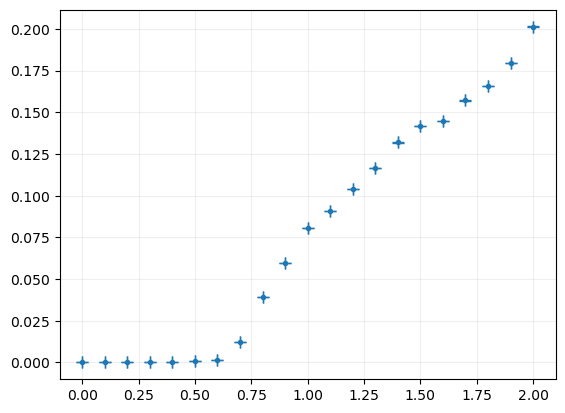

In [96]:
plt.figure()
plt.errorbar(I, W, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)

plt.grid(alpha = 0.2)
plt.show()

In [97]:
pot = [2.94e-6,49.76e-6,0.11e-3,0.198e-3,0.348e-3,0.618e-3,1.31e-3,13e-3,41.2e-3,63.5e-3,84.7e-3,103.6e-3,106.8e-3,116.4e-3,128e-3,136e-3,144.5e-3,153.2e-3,170.2e-3,188.2e-3,201.4e-3]
a = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]

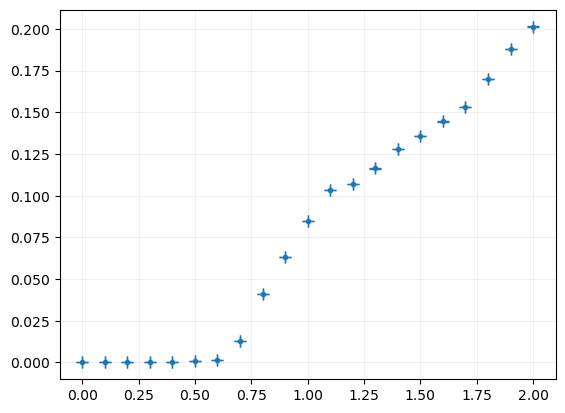

In [98]:
plt.figure()
plt.errorbar(a, pot, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)

plt.grid(alpha = 0.2)
plt.show()